[*********************100%***********************]  1 of 1 completed
Expected Value of being invested the day after a -2% drop: 0.0034742176023474397
Expected Value of being invested the day after a -2.5% drop: 0.005893277780837598
Expected Value of being invested the day after a -3% drop: 0.004772317119732062


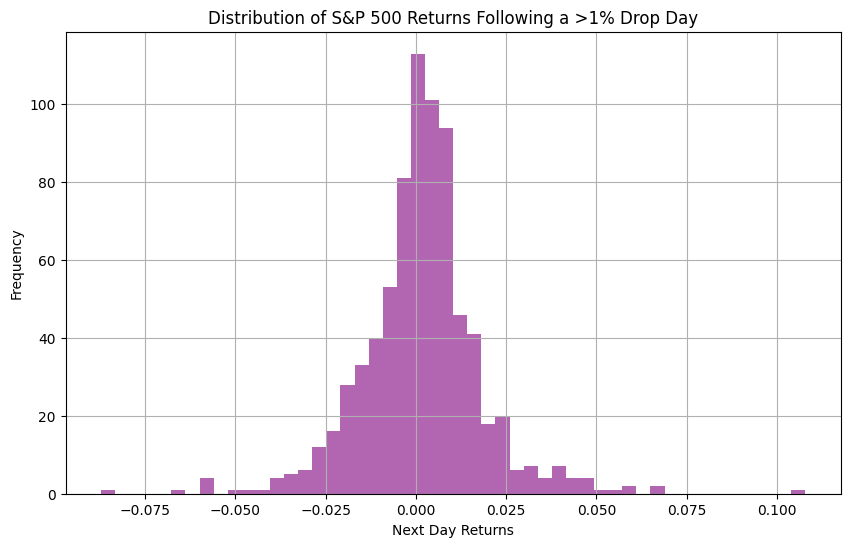

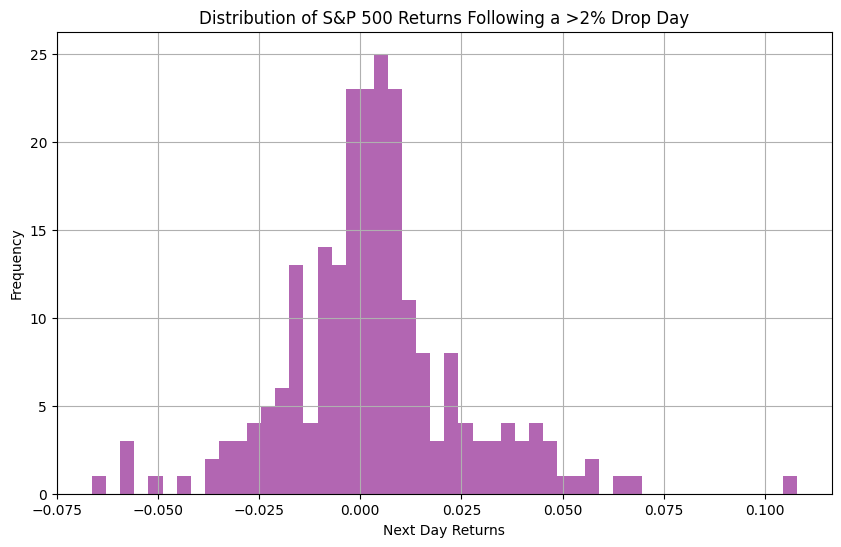

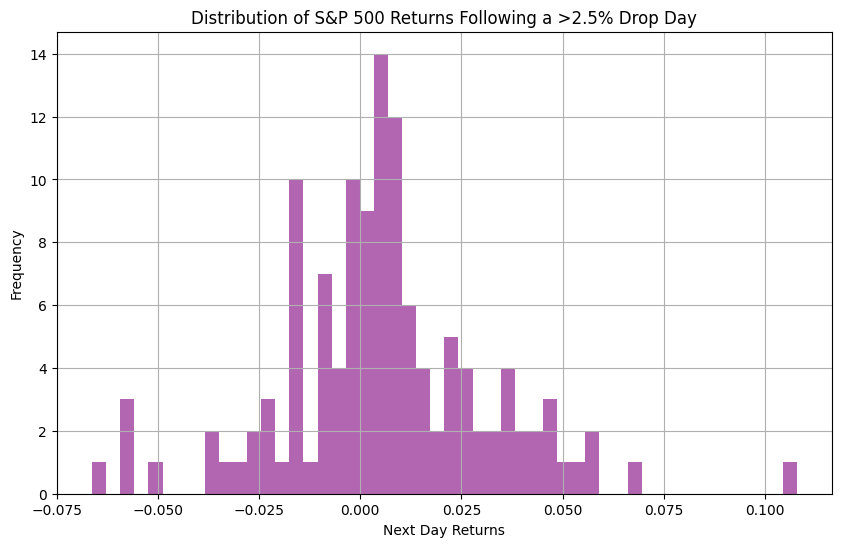

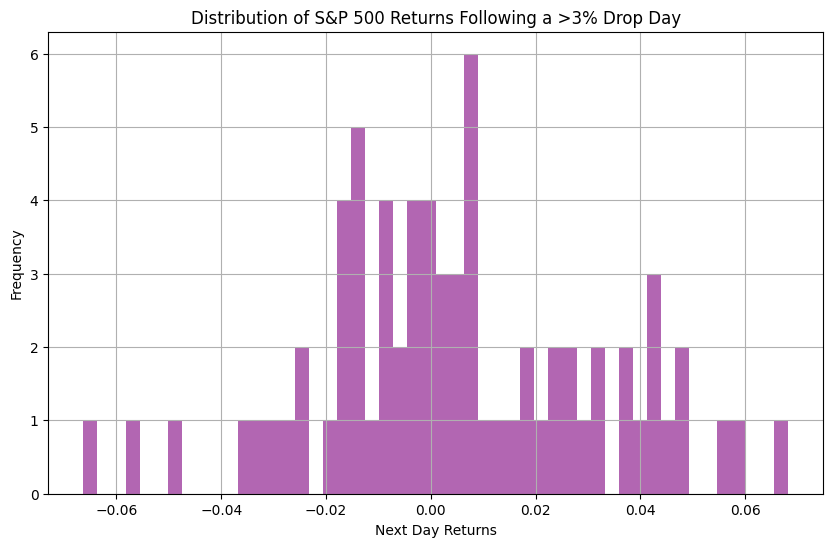

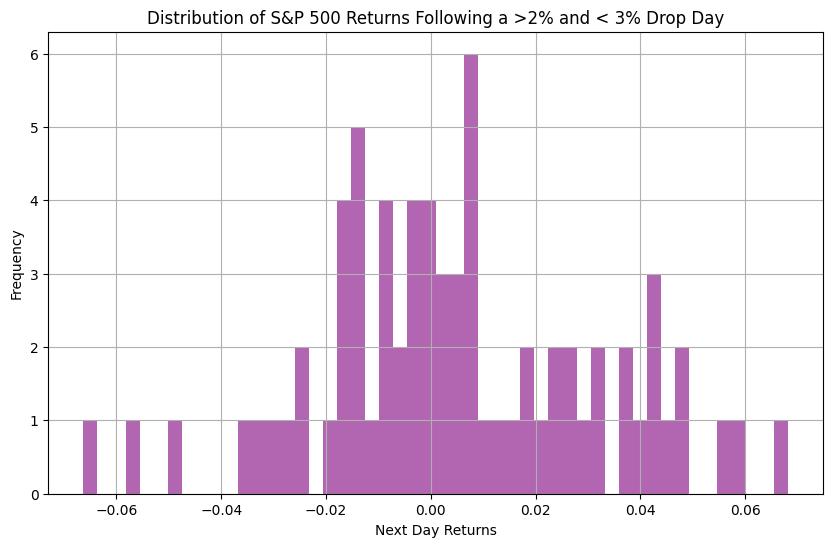

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch S&P 500 stock data
sp500 = yf.download('^SPX', start='2000-01-01', end='2023-01-01')

# Calculate open-to-close returns
sp500['Open_Close_Returns'] = (sp500['Close'] - sp500['Open']) / sp500['Open']

# Identify days where open-to-close returns are less than -2%
significant_drop_days1 = sp500['Open_Close_Returns'] < -0.01
significant_drop_days2 = sp500['Open_Close_Returns'] < -0.02 
significant_drop_days25 = sp500['Open_Close_Returns'] < -0.025
significant_drop_days3 = sp500['Open_Close_Returns'] < -0.03
significant_drop_days_between = sp500['Open_Close_Returns'].between(-0.025, -0.03)

# Calculate returns for the following day
sp500['Next_Day_Returns'] = sp500['Open_Close_Returns'].shift(-1)

# Filter to get returns after a significant drop
next_day_returns_after_drop_1 = sp500['Next_Day_Returns'][significant_drop_days1]
next_day_returns_after_drop_2 = sp500['Next_Day_Returns'][significant_drop_days2]
next_day_returns_after_drop_25 = sp500['Next_Day_Returns'][significant_drop_days25]
next_day_returns_after_drop_3 = sp500['Next_Day_Returns'][significant_drop_days3]
next_day_returns_after_drop_between = sp500['Next_Day_Returns'][significant_drop_days_between]



# Compute the Expected Value (EV) of being invested the day after a -2% drop
ev_next_day_returns_2 = next_day_returns_after_drop_2.mean()
# Display the EV
print(f"Expected Value of being invested the day after a -2% drop: {ev_next_day_returns_2}")
# Compute the Expected Value (EV) of being invested the day after a -2.5% drop
ev_next_day_returns_25 = next_day_returns_after_drop_25.mean()
# Display the EV
print(f"Expected Value of being invested the day after a -2.5% drop: {ev_next_day_returns_25}")
# Compute the Expected Value (EV) of being invested the day after a -3% drop
ev_next_day_returns_3 = next_day_returns_after_drop_3.mean()
# Display the EV
print(f"Expected Value of being invested the day after a -3% drop: {ev_next_day_returns_3}")



# Plotting the distribution of next day returns after a significant drop
plt.figure(figsize=(10, 6))
next_day_returns_after_drop_1.hist(bins=50, alpha=0.6, color='purple')
plt.title('Distribution of S&P 500 Returns Following a >1% Drop Day')
plt.xlabel('Next Day Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Plotting the distribution of next day returns after a significant drop
plt.figure(figsize=(10, 6))
next_day_returns_after_drop_2.hist(bins=50, alpha=0.6, color='purple')
plt.title('Distribution of S&P 500 Returns Following a >2% Drop Day')
plt.xlabel('Next Day Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of next day returns after a significant drop
plt.figure(figsize=(10, 6))
next_day_returns_after_drop_25.hist(bins=50, alpha=0.6, color='purple')
plt.title('Distribution of S&P 500 Returns Following a >2.5% Drop Day')
plt.xlabel('Next Day Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of next day returns after a significant drop
plt.figure(figsize=(10, 6))
next_day_returns_after_drop_3.hist(bins=50, alpha=0.6, color='purple')
plt.title('Distribution of S&P 500 Returns Following a >3% Drop Day')
plt.xlabel('Next Day Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of next day returns after a significant drop
plt.figure(figsize=(10, 6))
next_day_returns_after_drop_3.hist(bins=50, alpha=0.6, color='purple')
plt.title('Distribution of S&P 500 Returns Following a >2% and < 3% Drop Day')
plt.xlabel('Next Day Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




[*********************100%***********************]  1 of 1 completed
Total Number of Trades: 84
Percentage of Winning Trades: 64.29%


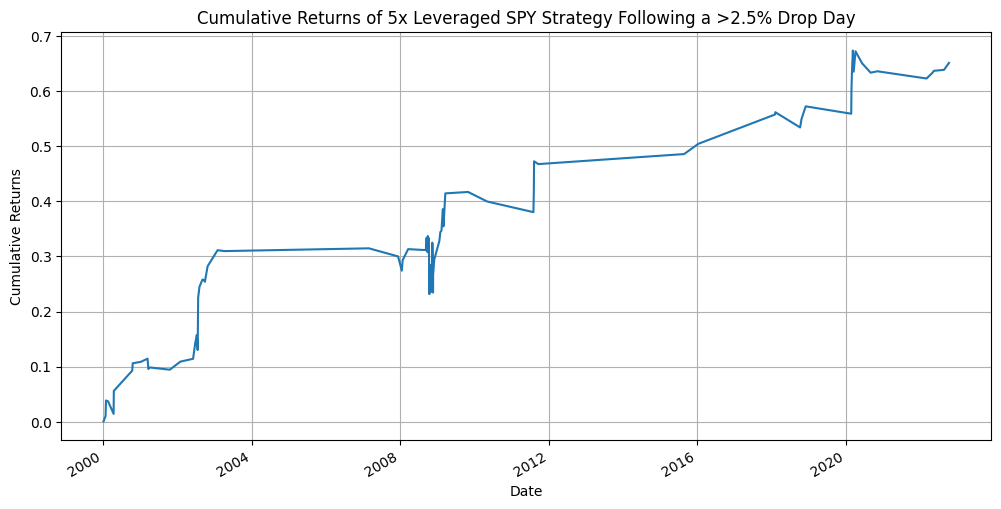

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Fetch SPY stock data
spy = yf.download('SPY', start='2000-01-01', end='2023-01-01')

# Calculate open-to-close returns
spy['Open_Close_Returns'] = (spy['Close'] - spy['Open']) / spy['Open']

# Identify days with an open-to-close drop of more than 2.5%
drop_days = spy['Open_Close_Returns'] < -0.025

# Calculate returns for the next day (strategy returns) and apply 5x leverage
spy['Next_Day_Strategy_Returns'] = spy['Open_Close_Returns'].shift(-1)
strategy_returns = spy['Next_Day_Strategy_Returns'][drop_days]

# Calculate the total number of trades and the percentage of winning trades
total_trades = strategy_returns.count()
winning_trades = (strategy_returns > 0).sum()
winning_percentage = (winning_trades / total_trades) * 100

# Print trade statistics
print(f"Total Number of Trades: {total_trades}")
print(f"Percentage of Winning Trades: {winning_percentage:.2f}%")

# Calculate cumulative returns
cumulative_returns = (1 + strategy_returns.fillna(0)).cumprod() - 1

# Plotting cumulative returns
plt.figure(figsize=(12, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns of 5x Leveraged SPY Strategy Following a >2.5% Drop Day')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


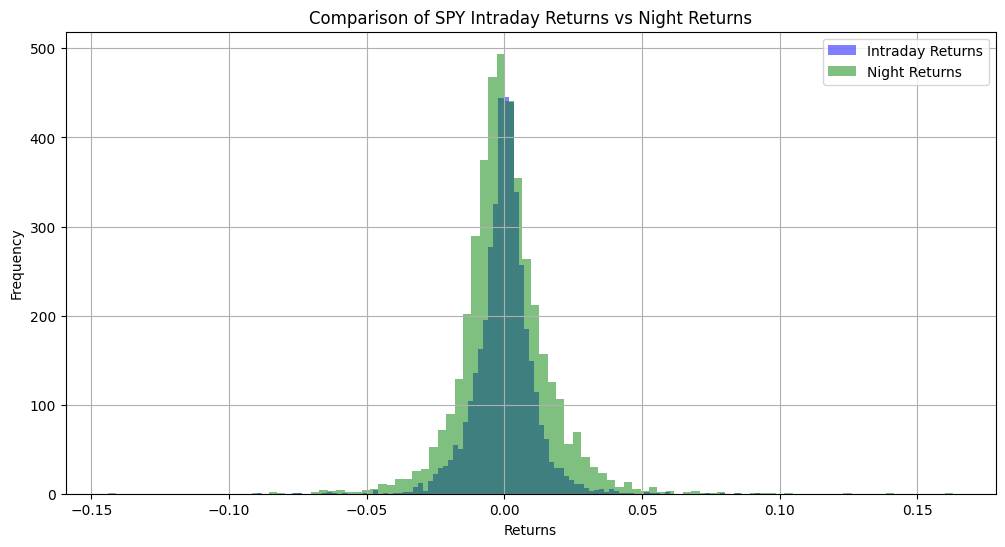

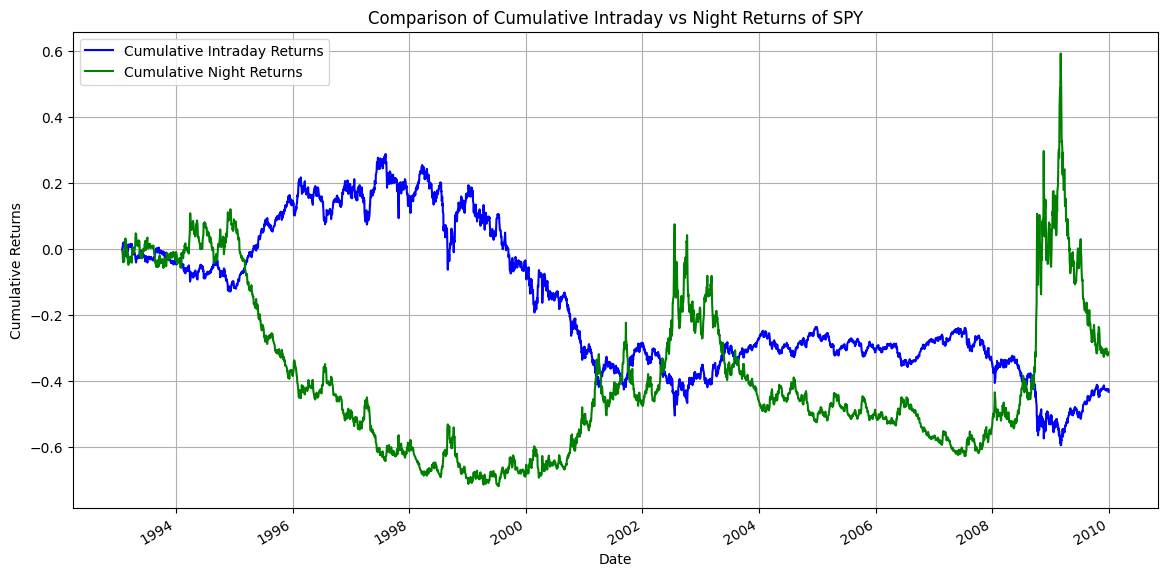

In [76]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch SPY stock data
spy = yf.download('SPY', start='1993-01-01', end='2010-01-01')

# Calculate intraday returns (open-to-close)
spy['Intraday_Returns'] = (spy['Close'] - spy['Open']) / spy['Open']

# Calculate night returns (close-to-open)
# Note: The shift(-1) function moves the closing prices up one row for calculation
spy['Night_Returns'] = (spy['Open'] - spy['Close'].shift(-1)) / spy['Close'].shift(-1)

# Plotting both distributions
plt.figure(figsize=(12, 6))
spy['Intraday_Returns'].hist(bins=100, alpha=0.5, label='Intraday Returns', color='blue')
spy['Night_Returns'].hist(bins=100, alpha=0.5, label='Night Returns', color='green')
plt.title('Comparison of SPY Intraday Returns vs Night Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


spy['Cumulative_Intraday_Returns'] = (1 + spy['Intraday_Returns']).cumprod() - 1
spy['Cumulative_Night_Returns'] = (1 + spy['Night_Returns']).cumprod() - 1

# Plotting both cumulative returns
plt.figure(figsize=(14, 7))
spy['Cumulative_Intraday_Returns'].plot(label='Cumulative Intraday Returns', color='blue')
spy['Cumulative_Night_Returns'].plot(label='Cumulative Night Returns', color='green')
plt.title('Comparison of Cumulative Intraday vs Night Returns of SPY')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

